<font color="#399DA6"><h1>Testing a music</h1></font>

Importing all the required libraries:

    "Load_data": extracts all the features from dataset
    
    "LDA": Linear Discriminant Analysis library

In [1]:
import sys
import numpy as np
import pandas as pd
sys.path.insert(0, '../Libraries')
sys.path.insert(0, '../Datas/')

from Load_data import *
from LDA import *
from PCA import *

Using *loaddata()*, all the features from dataset are extracted and stored in a data frame.

Then features and labels are divided.

In [2]:
dataset='591'
df=loaddata(features=["chroma_cqt","melspectrogram"], adr1=f'../Datas/X_{dataset}.pickle',adr2=f'../Datas/label_instrument_{dataset}.pickle',adr3=f'../Datas/label_dastgah_{dataset}.pickle')
df = df.sample(frac=1,random_state=0).reset_index(drop=True)
feature_vectors=df.drop(["dastgah","instrument"],axis=1)
Label="dastgah"
y=df[Label]
PCAin=False
LDAin=True

n=1

In [3]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(feature_vectors,y,test_size=0.2,random_state=0)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [4]:
clf = KNeighborsClassifier(n_neighbors = 12).fit(X_train,y_train.values.ravel())
yhat = clf.predict(X_test)
acc=metrics.accuracy_score(y_test.values.ravel(), yhat)
print(acc)

0.20863309352517986


In [5]:

df_train=pd.DataFrame(X_train,columns=feature_vectors.columns)
df_train[Label]=y_train

df_train=df_train[df_train["dastgah"]!=n]


In [6]:

X_train=df_train.drop([Label],axis=1)
y_train=df_train[Label]

In [7]:
from preprocess import *
X_train,X_test = preprocess(X_train,X_test)


Utilizing the LDA library, feature conditioning is done and only the selected features are stored in *feature_vectors* data frame.

In [8]:
if(PCAin):
    Pca=pca(X_train)
    X_train=Pca.PCAout(50)
    X_test=Pca.PCA_changeX(X_test)

The selected features are shown:

Classifiers KNN, SVM, MLP, Logistic, Adaboost, and XGBoost are used

<font color="#61C29E"><h1>1) KNN</h2></font>
After classification, accuracy and confusion matrix are reported.

In [9]:
Accuracies = [["KNN",0], ["SVM",0], ["MLP",0], ["Logistic",0], ["Adaboost",0], ["XGBoost",0]]

The best accuracy is 35.42 % with k = 18
Cross-Validation Results:  [0.3958333333333333, 0.23958333333333334, 0.40625, 0.3541666666666667, 0.375]
min validation accuracy is 23.96 % with k = 18
mean validation accuracy is 35.42 % with k = 18
max validation accuracy is 40.62 % with k = 18


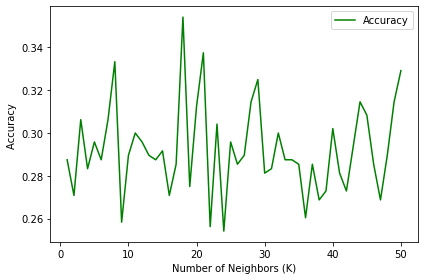

====> Test accuracy is 22.3 % with k = 18


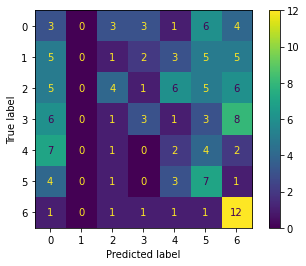

In [10]:
from KNN import *
L=-1
Knn=KNN(X_train,y_train,X_test,y_test)
K=Knn.plot(50,LDAin,L)
# Knn.accurate(K,X_test,y_test,LDAin=LDAin)
Accuracies[0][1] = Knn.acc

<font color="#61C29E"><h1>2) SVM</h2></font>
After classification, accuracy and confusion matrix are reported.

Cross-Validation Results:  [0.3333333333333333, 0.25, 0.28125, 0.3541666666666667, 0.3125]
min validation accuracy is 25.0
mean validation accuracy is 30.63
max validation accuracy is 35.42
====> Test accuracy is 26.62


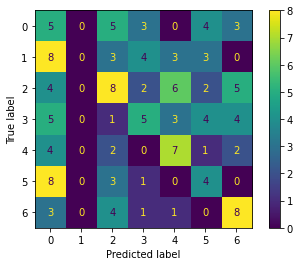

              precision    recall  f1-score   support

         0.0       0.14      0.25      0.18        20
         1.0       0.00      0.00      0.00        21
         2.0       0.31      0.30      0.30        27
         3.0       0.31      0.23      0.26        22
         4.0       0.35      0.44      0.39        16
         5.0       0.22      0.25      0.24        16
         6.0       0.36      0.47      0.41        17

    accuracy                           0.27       139
   macro avg       0.24      0.28      0.25       139
weighted avg       0.24      0.27      0.25       139



c:\Users\moham\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\moham\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\moham\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [11]:
from SVM import *
svm=SVM(X_train,y_train,X_test,y_test)
svm.accurate(LDAin=LDAin)
Accuracies[1][1] = svm.acc

<font color="#61C29E"><h1>3) MLP</h2></font>
After classification, accuracy and confusion matrix are reported.

Cross-Validation Results:  [0.28125, 0.2708333333333333, 0.22916666666666666, 0.3125, 0.3125]
min validation accuracy is 22.92
mean validation accuracy is 28.12
max validation accuracy is 31.25
====> Test accuracy is 38.85


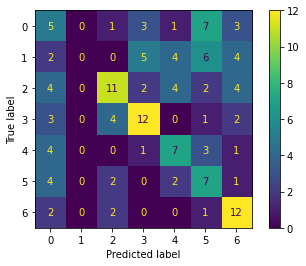

              precision    recall  f1-score   support

         0.0       0.21      0.25      0.23        20
         1.0       0.00      0.00      0.00        21
         2.0       0.55      0.41      0.47        27
         3.0       0.52      0.55      0.53        22
         4.0       0.39      0.44      0.41        16
         5.0       0.26      0.44      0.33        16
         6.0       0.44      0.71      0.55        17

    accuracy                           0.39       139
   macro avg       0.34      0.40      0.36       139
weighted avg       0.35      0.39      0.36       139



c:\Users\moham\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\moham\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\moham\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [12]:
from mlp import *
mlp=MLP(X_train,y_train,X_test,y_test)
mlp.accurate(LDAin=LDAin)
Accuracies[2][1] = mlp.acc

<font color="#61C29E"><h1>4) Logistic</h2></font>
After classification, accuracy and confusion matrix are reported.

Cross-Validation Results:  [0.2604166666666667, 0.3333333333333333, 0.3020833333333333, 0.3125, 0.21875]
min validation accuracy is 21.88
mean validation accuracy is 28.54
max validation accuracy is 33.33
====> Test accuracy is 27.34


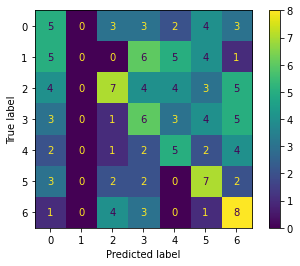

              precision    recall  f1-score   support

         0.0       0.22      0.25      0.23        20
         1.0       0.00      0.00      0.00        21
         2.0       0.39      0.26      0.31        27
         3.0       0.23      0.27      0.25        22
         4.0       0.26      0.31      0.29        16
         5.0       0.28      0.44      0.34        16
         6.0       0.29      0.47      0.36        17

    accuracy                           0.27       139
   macro avg       0.24      0.29      0.25       139
weighted avg       0.24      0.27      0.25       139



c:\Users\moham\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\moham\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\moham\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [13]:
from LogisticRegression import *
lr=LR(X_train,y_train,X_test,y_test)
lr.accurate(LDAin=LDAin)
Accuracies[3][1] = lr.acc

<font color="#61C29E"><h1>5) AdaBoost</h2></font>
After classification, accuracy and confusion matrix are reported.

Cross-Validation Results:  [0.3020833333333333, 0.21875, 0.1875, 0.2604166666666667, 0.28125]
min validation accuracy is 18.75
mean validation accuracy is 25.0
max validation accuracy is 30.21
====> Test accuracy is 19.42


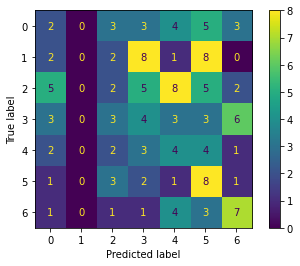

              precision    recall  f1-score   support

         0.0       0.12      0.10      0.11        20
         1.0       0.00      0.00      0.00        21
         2.0       0.12      0.07      0.09        27
         3.0       0.15      0.18      0.17        22
         4.0       0.16      0.25      0.20        16
         5.0       0.22      0.50      0.31        16
         6.0       0.35      0.41      0.38        17

    accuracy                           0.19       139
   macro avg       0.16      0.22      0.18       139
weighted avg       0.15      0.19      0.16       139



c:\Users\moham\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\moham\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\moham\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [14]:
from adaboost import *
adaboost=ADABOOST(X_train,y_train,X_test,y_test)
adaboost.accurate(LDAin=LDAin)
Accuracies[4][1] = adaboost.acc

<font color="#61C29E"><h1>6) XGBoost</h2></font>
After classification, accuracy and confusion matrix are reported.

In [15]:
from XGBoost import *
xgboost=XGBoost(X_train,y_train,X_test,y_test)
xgboost.acc=0
xgboost.yhat=[-1 for i in range(len(y_train))]
try:
    xgboost.accurate(LDAin=LDAin)
except:
    pass
Accuracies[5][1] = xgboost.acc

In [16]:
temp = np.zeros((6,1))
for i in range(6):
    temp[i] = Accuracies[i][1]
for j in range(6):
    if Accuracies[j][1] == np.max(temp):
        print(Accuracies[j])

['MLP', 0.38848920863309355]


In [17]:
Accuracies

[['KNN', 0.22302158273381295],
 ['SVM', 0.26618705035971224],
 ['MLP', 0.38848920863309355],
 ['Logistic', 0.2733812949640288],
 ['Adaboost', 0.19424460431654678],
 ['XGBoost', 0]]